## MesoNet implementation on CEDAR, ICDAR 2011 and other signature dataset

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_83 (Conv2D)                   │ (None, 128, 128, 8)         │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 128, 128, 8)         │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 64, 64, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_84 (Conv2D)                   │ (None, 64, 64, 8)           │           1,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 64, 64, 8)           │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 32, 32, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_85 (Conv2D)                   │ (None, 32, 32, 16)          │           3,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 32, 32, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 16)                  │          65,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 70,601 (275.79 KB)

 Trainable params: 70,537 (275.54 KB)

 Non-trainable params: 64 (256.00 B)

Epoch 1/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.7516 - loss: 0.6114 - val_accuracy: 0.4841 - val_loss: 0.7415
Epoch 2/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.8111 - loss: 0.4938 - val_accuracy: 0.4854 - val_loss: 1.3532
Epoch 3/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.8312 - loss: 0.4663 - val_accuracy: 0.7205 - val_loss: 0.6169
Epoch 4/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.8680 - loss: 0.4229 - val_accuracy: 0.5388 - val_loss: 0.6926
Epoch 5/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.8511 - loss: 0.4336 - val_accuracy: 0.5260 - val_loss: 12.6398
Epoch 6/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.8754 - loss: 0.3898 - val_accuracy: 0.8615 - val_loss: 0.3945
Epoch 7/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.8995 - loss: 0.3672 - val_accuracy: 0.4930 - val_loss: 0.7385
Epoch 8/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.9081 - loss: 0.3344 - val_accuracy: 0.8539 -

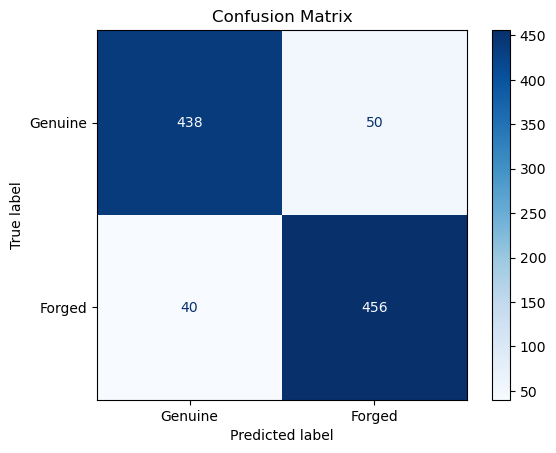

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


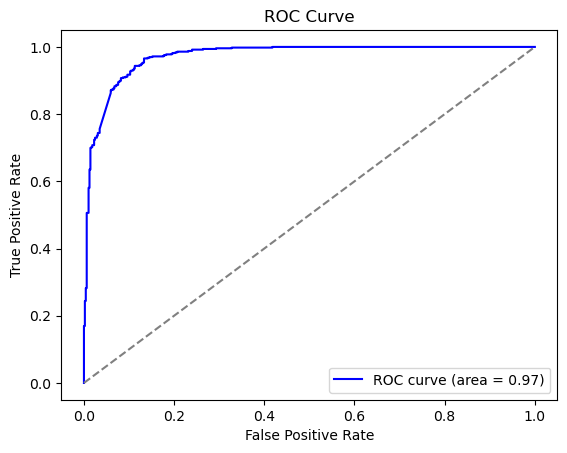

MesoNet model saved successfully.


In [11]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Dataset Paths
dataset_paths = {
    'CEDAR': r"D:\signature\CEDAR_relocated",
    'ICDAR': r"D:\signature\ICDAR-2011_relocated",
    'OTHER': r"D:\signature\Dataset_signature_final" 
}

# Load Images Function
def load_images(dataset_path):
    images = []
    labels = []
    for folder in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder)
        if os.path.isdir(folder_path):
            for label, subfolder in enumerate(['original', 'forged']):
                subfolder_path = os.path.join(folder_path, subfolder)
                if os.path.exists(subfolder_path):
                    for file in os.listdir(subfolder_path):
                        img_path = os.path.join(subfolder_path, file)
                        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                        if img is not None:
                            img = cv2.resize(img, (128, 128))
                            images.append(img)
                            labels.append(label)
    return np.array(images), np.array(labels)

# Load All Datasets
all_images = []
all_labels = []

for dataset_name, dataset_path in dataset_paths.items():
    images, labels = load_images(dataset_path)
    all_images.append(images)
    all_labels.append(labels)

all_images = np.concatenate(all_images, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

# Normalize Images
all_images = all_images / 255.0
all_images = all_images.reshape(-1, 128, 128, 1)

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

# MesoNet Model Definition
def build_meso_net(input_shape=(128, 128, 1)):
    model = models.Sequential()
    
    # First Convolutional Block
    model.add(layers.Conv2D(8, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
    
    # Second Convolutional Block
    model.add(layers.Conv2D(8, (5, 5), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
    
    # Third Convolutional Block
    model.add(layers.Conv2D(16, (5, 5), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
    
    # Fully Connected Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Compile the Model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Build and Train Model
meso_model = build_meso_net()
meso_model.summary()

# Train Model
history = meso_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate Model
y_pred = (meso_model.predict(X_test) > 0.5).astype(int)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Genuine', 'Forged'])
cmd.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, meso_model.predict(X_test))
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Save Model
meso_model.save('mesonet_signature_forgery_model.h5')
print("MesoNet model saved successfully.")


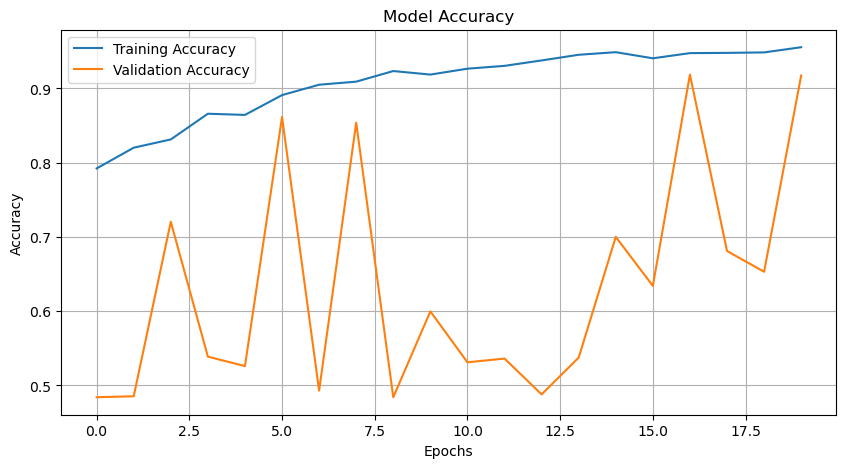

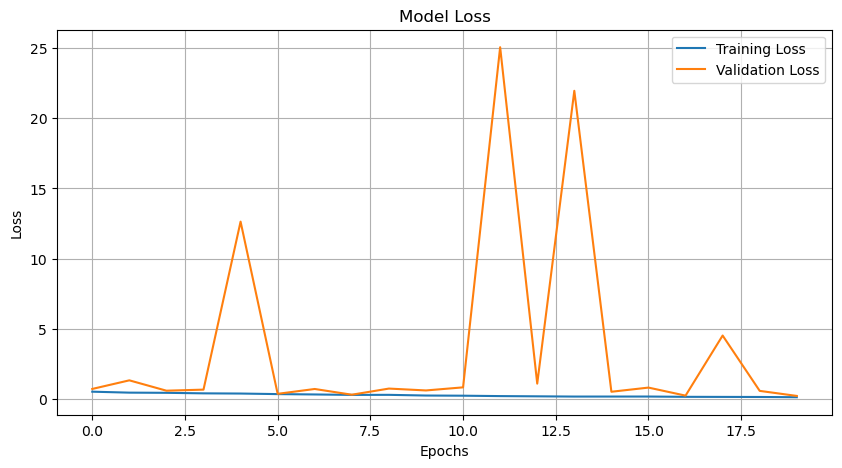

In [12]:
# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
import tensorflow as tf
# Load Model
loaded_model = tf.keras.models.load_model(r'D:\signature codes\mesonet_signature_forgery_model_cedar_icdar_other.h5')
print("Model loaded successfully.")

Model loaded successfully.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


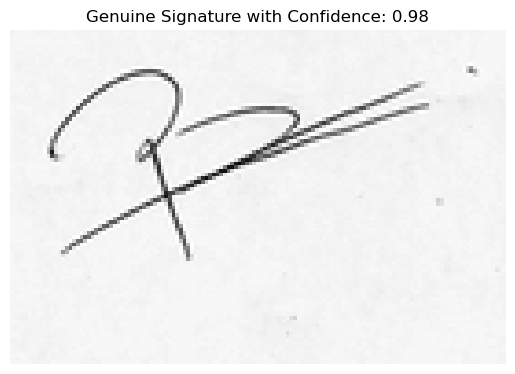

In [24]:
import cv2
import matplotlib.pyplot as plt
# Function to Highlight Forged Areas with Circles
def highlight_forgery(image):
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (128, 128)) / 255.0
    img_resized = img_resized.reshape(1, 128, 128, 1)
    prediction = loaded_model.predict(img_resized)[0][0]

    if prediction > 0.5:
        img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        edges = cv2.Canny(img, 50, 150)  # Edge Detection
        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for contour in contours:
            if cv2.contourArea(contour) > 50:  # Filter small noise
                (x, y), radius = cv2.minEnclosingCircle(contour)
                center = (int(x), int(y))
                radius = int(radius)
                cv2.circle(img_color, center, radius, (0, 0, 255), 2)  # Draw red circle

        plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
        plt.title(f"Forgery Detected with Confidence: {prediction:.2f}")
        plt.axis('off')
        plt.show()
    else:
        plt.imshow(img, cmap='gray')
        plt.title(f"Genuine Signature with Confidence: {1-prediction:.2f}")
        plt.axis('off')
        plt.show()

# Example Usage
image_path =  r"D:\signature\Dataset_signature_final\1\Original\00500005.png"# Replace with your image path
highlight_forgery(image_path)